<a href="https://colab.research.google.com/github/Nawshin-25/Saint_Martin/blob/main/GAI_(Sediment).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

In [ ]:
file_name = '/content/drive/MyDrive/Data/ST_HM_Mod.xlsx'
IGEO_df = pd.read_excel(file_name, sheet_name='GAI (SED)')
IGEO_df_cleaned = IGEO_df.dropna()
print (IGEO_df_cleaned)

  Element Name     St 01     St 02     St 03     St 04     St 07     St 08  \
0           As -8.174371 -3.082828 -3.469827 -3.352207 -7.469827 -3.399828   
1           Pb -0.397511 -0.072736 -0.087989 -0.332485 -0.723007 -0.523189   
2           Hg -4.360922 -3.046921 -4.184425 -2.871267 -4.070967 -3.189900   
3           Fe -1.231113 -0.137566 -0.113462 -0.731898 -0.747567 -0.176716   
4           Cd  -1.36257 -1.847997  0.000000  0.000000  0.000000  0.000000   
5           Mn -0.661646 -0.883740 -0.952147 -0.946684 -1.171623 -1.319102   
6           Cu -2.980891 -1.562693 -1.708746 -1.894918 -3.444547 -2.264317   
7           Zn -2.363004 -0.747125 -0.711875 -1.019365 -2.337195 -1.289394   
8           Cr -2.671674 -0.880828 -0.615950 -1.098677 -2.080766 -1.378111   
9           Ni -0.904903  0.373385  0.015242  0.061155 -1.485898 -0.626211   

      St 09     St 10  
0 -3.517324 -3.304153  
1 -0.641979 -0.721175  
2 -2.958290 -2.949613  
3 -0.382672 -0.241154  
4  3.669279  0.000000

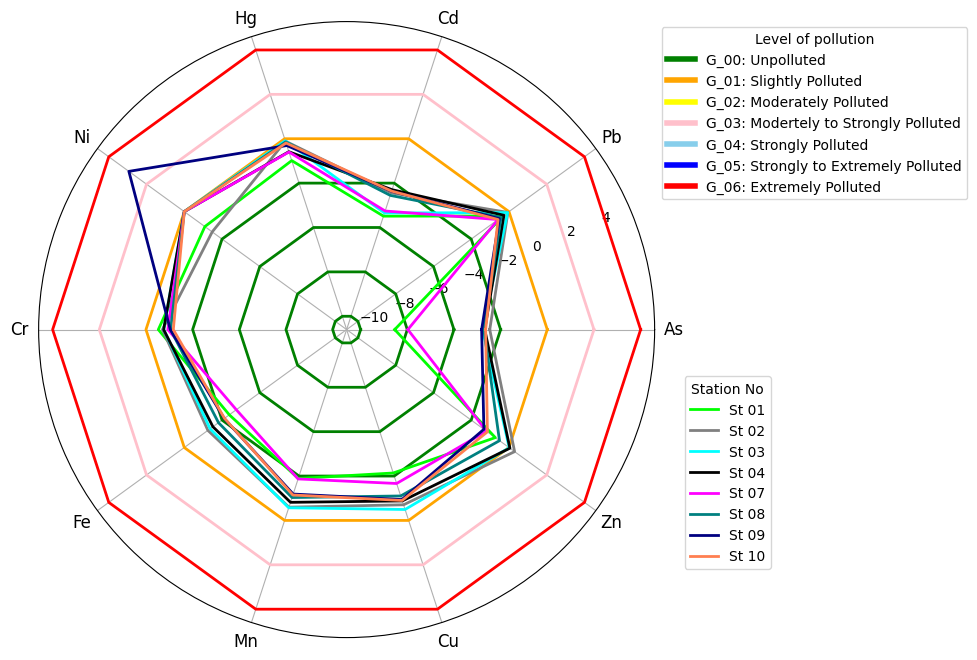

In [ ]:
elements = ['As', 'Pb', 'Cd', 'Hg', 'Ni', 'Cr', 'Fe', 'Mn', 'Cu', 'Zn']
N = len(elements)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Complete the loop by repeating the first angle
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

station_colors = {
    'St 01': 'lime',
    'St 02': 'gray',
    'St 03': 'cyan',
    'St 04': 'black',
    'St 07': 'magenta',
    'St 08': 'teal',
    'St 09': 'navy',
    'St 10': 'coral'
}

circle_color_ranges = {
    (-10, 0): 'green',
    (0, 1): 'orange',
    (1, 2): 'yellow',
    (2, 3): 'pink',
    (3, 4): 'skyblue',
    (4, 5): 'blue',
    (5, np.inf): 'red'
}

grid_values = np.linspace(-10, 5, 7)  # Grid values based on your specific range
for grid_val in grid_values:
    color = next(color for (low, high), color in circle_color_ranges.items() if low <= grid_val < high)
    ax.plot(angles, [grid_val] * len(angles), color=color, lw=2)  # Draw each circle with the assigned color

for station in ['St 01', 'St 02', 'St 03', 'St 04', 'St 07', 'St 08', 'St 09', 'St 10']:
    values = IGEO_df_cleaned[station].values.flatten().tolist()  # Extract values for the station
    values += values[:1]  # Repeat first value to close the radar chart
    color = station_colors[station]  # Assign the color
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid', label=station)  # Border color
    ax.fill(angles, values, color=color, alpha=0)  # No fill (hollow)

station_legend = plt.legend(loc='lower right', bbox_to_anchor=(1.2, 0.1), title="Station No")
circle_labels = [
    'G_00: Unpolluted',
    'G_01: Slightly Polluted',
    'G_02: Moderately Polluted',
    'G_03: Modertely to Strongly Polluted',
    'G_04: Strongly Polluted',
    'G_05: Strongly to Extremely Polluted',
    'G_06: Extremely Polluted'
]
circle_colors = ['green', 'orange', 'yellow', 'pink', 'skyblue', 'blue', 'red']  # Adjusted for each range
circle_legend = [plt.Line2D([0], [0], color=color, lw=4) for color in circle_colors]
plt.legend(circle_legend, circle_labels, loc='lower left', bbox_to_anchor=(1.0, 0.7), title="Level of pollution")
ax.set_xticks(angles[:-1])  # Set positions of labels
ax.set_xticklabels(elements, fontsize=12)  # Set the names of elements
ax.yaxis.grid(False)  # Disable the default gridlines since we drew custom ones
plt.gca().add_artist(station_legend)  # Re-add station legend after the second legend
plt.show()